In [1]:
from sklearn.datasets import make_blobs
X, y =make_blobs(centers=4, random_state =8)
y = y%2

In [2]:
from IPython.display import display

import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

import pandas as pd

import mglearn

import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus']=False

if platform.system()=='Darwin':
    rc('font', family='AppleGothic')
elif platform.system() =='Windows':
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

C:\Users\multicampus\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\multicampus\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


Text(0, 0.5, '특성 1')

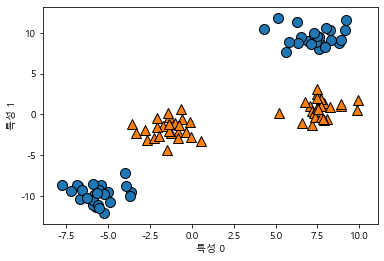

In [3]:
mglearn.discrete_scatter(X[:,0], X[:,1],y)
plt.xlabel('특성 0')
plt.ylabel('특성 1')

In [4]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X,y)

C:\Users\multicampus\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0, 0.5, '특성 1')

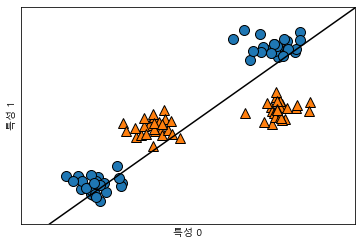

In [5]:
mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:,0], X[:,1],y)
plt.xlabel('특성 0')
plt.ylabel('특성 1')

Text(0.5, 0, '특성 1**2')

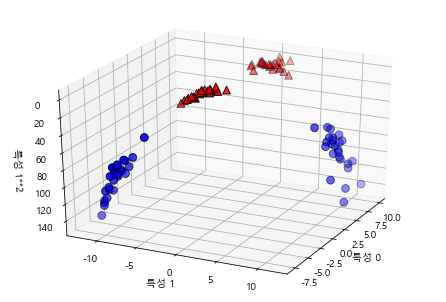

In [6]:
# 두 번째 특성을 제곱하여 추가합니다.
X_new = np.hstack([X, X[:,1:]**2])
from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# 3차원 그래프
ax = Axes3D(figure, elev=-152, azim =-26)
# y == 0인 포인트를 먼저 그리고 다음 y==1인 포인트를 그립니다.
mask = y ==0
ax.scatter(X_new[mask,0], X_new[mask, 1], X_new[mask, 2], c='b',
          cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask,0], X_new[~mask,1], X_new[~mask, 2], c='r', marker='^',
          cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel('특성 0')
ax.set_ylabel('특성 1')
ax.set_zlabel('특성 1**2')

C:\Users\multicampus\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0.5, 0, '특성 1 **2')

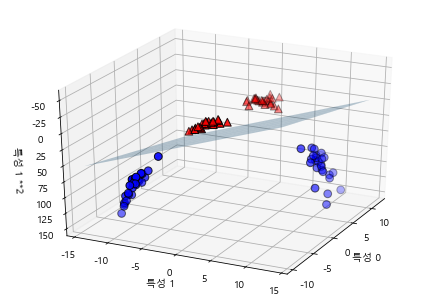

In [7]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_
# 선형 결정 경계 그리기
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim = -26)
xx = np.linspace(X_new[:,0].min()- 2,X_new[:,0].max() +2, 50)
yy = np.linspace(X_new[:,1].min()-2, X_new[:,1].max() +2, 50)

XX,YY = np.meshgrid(xx,yy)
ZZ =(coef[0] * XX +coef[1]*YY +intercept) / -coef[2]
ax.plot_surface(XX,YY,ZZ,rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask,1], X_new[mask, 2],c ='b',
          cmap=mglearn.cm2, s =60, edgecolor='k')
ax.scatter(X_new[~mask,0], X_new[~mask,1], X_new[~mask,2], c='r', marker='^',
          cmap = mglearn.cm2, s=60, edgecolor='k')

ax.set_xlabel('특성 0')
ax.set_ylabel('특성 1')
ax.set_zlabel('특성 1 **2')

Text(0, 0.5, '특성 1')

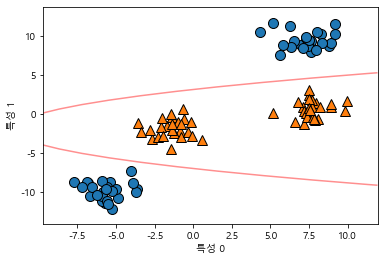

In [8]:
ZZ = YY **2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contour(XX, YY, dec.reshape(XX.shape), levels = [dec.min(), 0, dec.max()],
           cmap=mglearn.cm2, alpha =0.5)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel('특성 0')
plt.ylabel('특성 1')

### 커널 기법

###  SVM 이해하기

Text(0, 0.5, '특성 1')

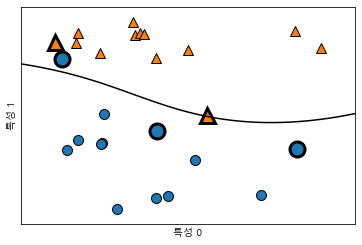

In [9]:
from sklearn.svm import SVC
X,y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel ='rbf', C=10, gamma = 0.1).fit(X,y)
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
#데이터 포인트 그리기
mglearn.discrete_scatter(X[:, 0], X[:,1], y)
#서포트 벡터
sv = svm.support_vectors_
# dual_coef_의 부호에 의해 서포트 벡터의 클래스 레이블이 결정됩니다.
sv_labels = svm.dual_coef_.ravel()>0
mglearn.discrete_scatter(sv[:,0], sv[:,1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel('특성 0')
plt.ylabel('특성 1')

### SVM 매개변수 튜닝

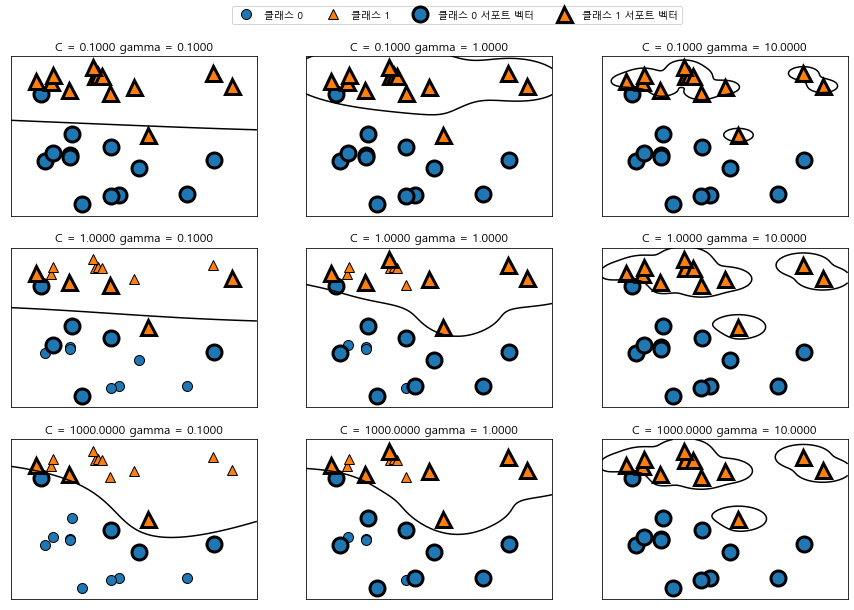

In [10]:
fig, axes = plt.subplots(3,3, figsize=(15,10))

for ax, C in zip(axes, [-1,0,3]):
    for a, gamma in zip(ax, range(-1,2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
        
axes[0,0].legend(['클래스 0', '클래스 1', '클래스 0 서포트 벡터',
                 '클래스 1 서포트 벡터'], ncol =4, loc=(.9, 1.2))

In [11]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

In [12]:
svc = SVC()
svc.fit(X_train, y_train)

C:\Users\multicampus\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [13]:
print('훈련 세트 정확도:{:.3f}'.format(svc.score(X_train, y_train)))
print('테스트 세트 정확도:{:.3f}'.format(svc.score(X_test, y_test)))

훈련 세트 정확도:1.000
테스트 세트 정확도:0.629


Text(0, 0.5, '특성 크기')

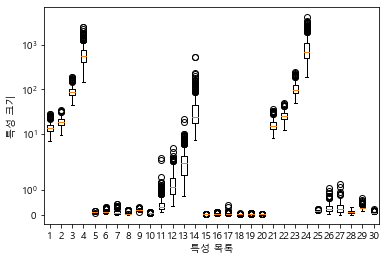

In [14]:
plt.boxplot(X_train)
plt.yscale('symlog')
plt.xlabel('특성 목록')
plt.ylabel('특성 크기')

### SVM을 위한 데이터 전처리

In [15]:
# 훈련 세트에서 특성별 최솟값 계산
min_on_training = X_train.min(axis =0)
# 훈련 세트에서 특성별 (최댓값 - 최솟값) 범위 계산
range_on_training = (X_train - min_on_training).max(axis =0)

#훈련 데이터에 최솟값을 빼고 범위로 나누면
#각 특성에 대해 최솟값은 0 최댓값은 1입니다.

X_train_scaled = (X_train - min_on_training) / range_on_training
print('특성별 최솟값 \n', X_train_scaled.min(axis=0))
print('특성별 최댓값 \n', X_train_scaled.max(axis=0))

특성별 최솟값 
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
특성별 최댓값 
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [16]:
# 테스트 세트에도 같은 작업을 적용하지만
# 훈련 세트에서 계산한 최솟값과 범위를 사용합니다.
X_test_scaled = (X_test - min_on_training) / range_on_training

In [17]:
svc = SVC()
svc.fit(X_train_scaled, y_train)

print('훈련 세트 정확도: {:.3f}'.format(svc.score(X_train_scaled, y_train)))
print('테스트 세트 정확도:{:.3f}'.format(svc.score(X_test_scaled, y_test)))

훈련 세트 정확도: 0.948
테스트 세트 정확도:0.951


C:\Users\multicampus\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [18]:
svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)
print('훈련 세트 정확도:{:.3f}'.format(svc.score(X_train_scaled, y_train)))
print('테스트 세트 정확도:{:.3f}'.format(svc.score(X_test_scaled, y_test)))

훈련 세트 정확도:0.988
테스트 세트 정확도:0.972


C:\Users\multicampus\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
